# GoogleStock Prediction Using RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("GoogleStockPrice_Train.csv")
test_df = pd.read_csv("GoogleStockPrice_Test.csv")

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,533.709833,151.904442,279.12,404.115,537.47,654.9225,816.68
High,1258.0,537.880223,153.008811,281.21,406.765,540.75,662.5875,816.68
Low,1258.0,529.007409,150.552807,277.22,401.765,532.99,644.8000,805.14


In [5]:
train_df.shape

(1258, 6)

### Check for Null and Duplicate Values

In [6]:
train_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Data Visualization

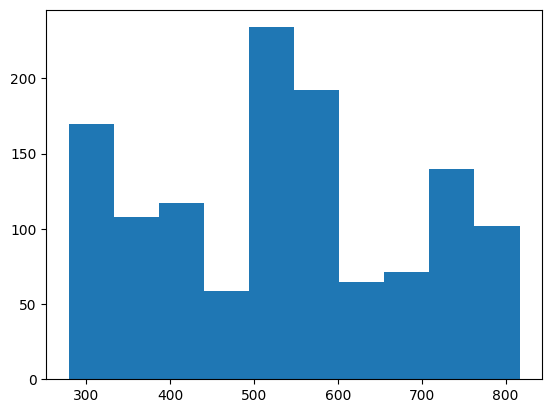

In [7]:
plt.hist(train_df["Open"])
plt.show()

[]

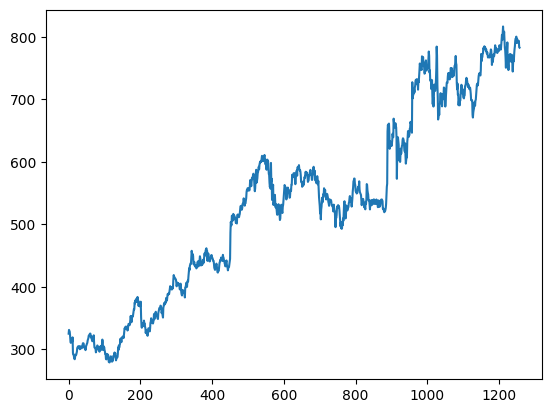

In [8]:
plt.plot(train_df["Open"])
plt.plot()

### Selecting Opening Price for Time Series

In [9]:
train_df = train_df.loc[:,["Open"]].values
train_df

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Standardizing the Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
sc = MinMaxScaler()
train_df = sc.fit_transform(train_df)

In [12]:
train_df

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
X_train = train_df[0:1257]
y_train = train_df[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [14]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [15]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM

In [16]:
regressor = Sequential()
regressor.add(LSTM(units=50, activation="sigmoid", return_sequences=True, input_shape=(None, 1)))
regressor.add(LSTM(units=50, activation="sigmoid", return_sequences=True, input_shape=(None, 1)))
regressor.add(LSTM(units=50, activation="sigmoid", return_sequences=True, input_shape=(None, 1)))
regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer="adam", loss='mean_squared_error')

In [18]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
40/40 [==============================] - 23s 10ms/step - loss: 0.1047
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0801
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0798
Epoch 4/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0797
Epoch 5/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0795
Epoch 6/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0791
Epoch 7/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0788
Epoch 8/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0770
Epoch 9/100
40/40 [==============================] - 0s 12ms/step - loss: 0.0747
Epoch 10/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0708
Epoch 11/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0634
Epoch 12/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0531
Epoch 13/100
40/40 [======

### Import Test Data

In [19]:
test_set = pd.read_csv('GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values


In [20]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Scale Down the test data

In [21]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [22]:
inputs

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [23]:
inputs = np.reshape(inputs, (20, 1, 1))

In [24]:
predicted_stock_price = regressor.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [25]:
predicted_stock_price

array([[[0.91719306]],

       [[0.93312776]],

       [[0.9293391 ]],

       [[0.94453484]],

       [[0.96275955]],

       [[0.9651302 ]],

       [[0.96048236]],

       [[0.96396154]],

       [[0.9645136 ]],

       [[0.96386427]],

       [[0.9618005 ]],

       [[0.9606776 ]],

       [[0.96358824]],

       [[0.9641402 ]],

       [[0.9883531 ]],

       [[0.99996686]],

       [[1.012833  ]],

       [[1.0079792 ]],

       [[0.97611743]],

       [[0.9471671 ]]], dtype=float32)

In [26]:
pred_price = np.reshape(predicted_stock_price, (20, 1))

In [27]:
pred_price = sc.inverse_transform(pred_price)

In [28]:
pred_price

array([[772.16626],
       [780.7321 ],
       [778.69556],
       [786.86414],
       [796.661  ],
       [797.93536],
       [795.4369 ],
       [797.3072 ],
       [797.60394],
       [797.2549 ],
       [796.1455 ],
       [795.5418 ],
       [797.10645],
       [797.4032 ],
       [810.41907],
       [816.6622 ],
       [823.5785 ],
       [820.96924],
       [803.8417 ],
       [788.2792 ]], dtype=float32)

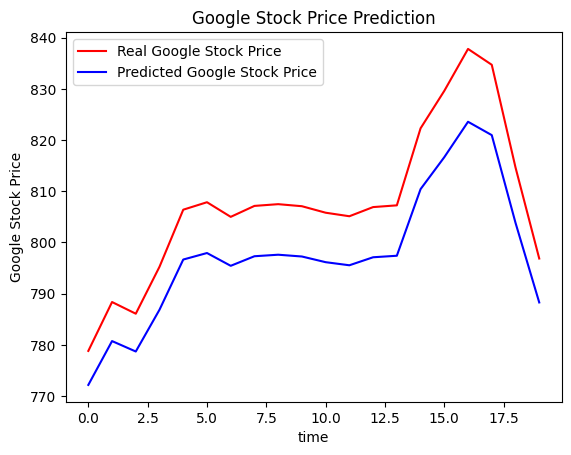

In [29]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot(pred_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()